<a href="https://colab.research.google.com/github/Shreyas5848/Household-energy-consumption/blob/main/Hierarchical_Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_csv('/content/KwhConsumptionBlower78_1 (1).csv')

In [ ]:
data.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


In [ ]:

data['TxnDate'] = pd.to_datetime(data['TxnDate'])

In [ ]:

daily_consumption = data.groupby('TxnDate')['Consumption'].sum().reset_index()

In [ ]:

daily_consumption.columns = ['Date', 'Total_Consumption']

In [ ]:

daily_consumption.head()

,Date,Total_Consumption
0,2022-01-01,65.462
1,2022-01-02,268.450
2,2022-01-03,236.566
3,2022-01-04,222.020
4,2022-01-05,380.630


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:

scaler = StandardScaler()
daily_consumption['Normalized_Consumption'] = scaler.fit_transform(daily_consumption[['Total_Consumption']])

In [ ]:

consumption_data = daily_consumption[['Normalized_Consumption']]

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [ ]:
linked = linkage(consumption_data, method='ward')

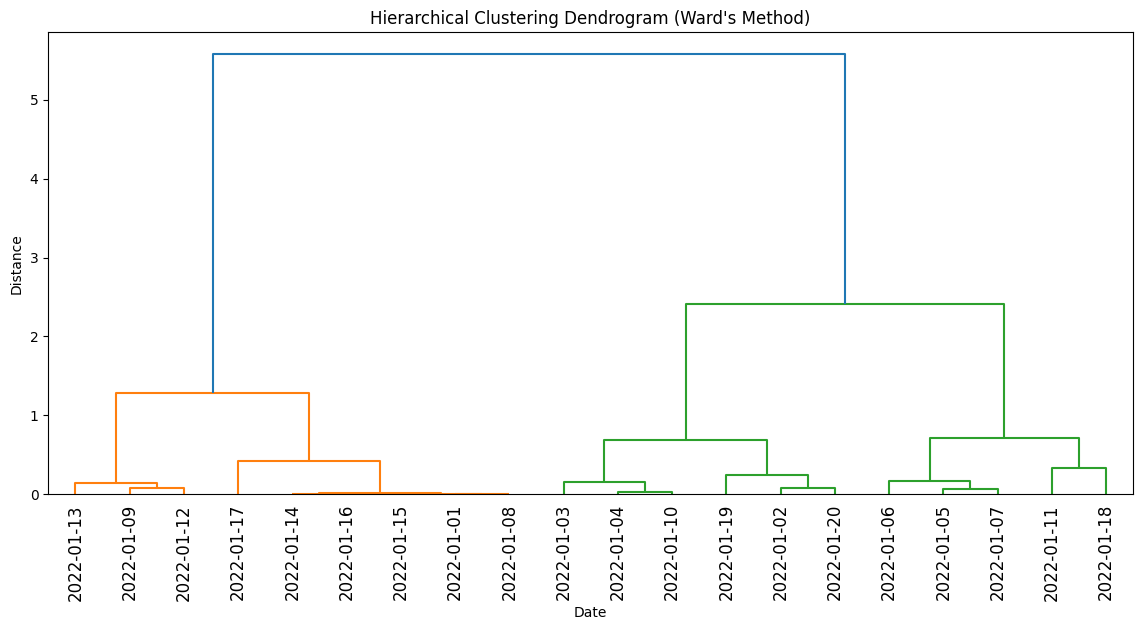

In [ ]:
plt.figure(figsize=(14, 6))
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
dendrogram(linked, labels=daily_consumption['Date'].dt.strftime('%Y-%m-%d').values, leaf_rotation=90)
plt.xlabel("Date")
plt.ylabel("Distance")
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

In [ ]:
num_clusters = 3
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

In [ ]:
daily_consumption['Cluster'] = cluster_labels

In [ ]:

score = silhouette_score(consumption_data, cluster_labels)

In [ ]:
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6543298987417981


In [ ]:
peak_usage_days = daily_consumption.sort_values(by='Total_Consumption', ascending=False)

In [ ]:
print("Top 10 Peak Usage Days:")
print(peak_usage_days.head(10))

Top 10 Peak Usage Days:
         Date  Total_Consumption  Normalized_Consumption  Cluster
5  2022-01-06            400.964                1.637942        3
6  2022-01-07            388.762                1.533013        3
4  2022-01-05            380.630                1.463083        3
17 2022-01-18            356.146                1.252537        3
10 2022-01-11            317.210                0.917713        3
18 2022-01-19            287.586                0.662966        2
1  2022-01-02            268.450                0.498409        2
19 2022-01-20            258.736                0.414875        2
2  2022-01-03            236.566                0.224227        2
3  2022-01-04            222.020                0.099141        2


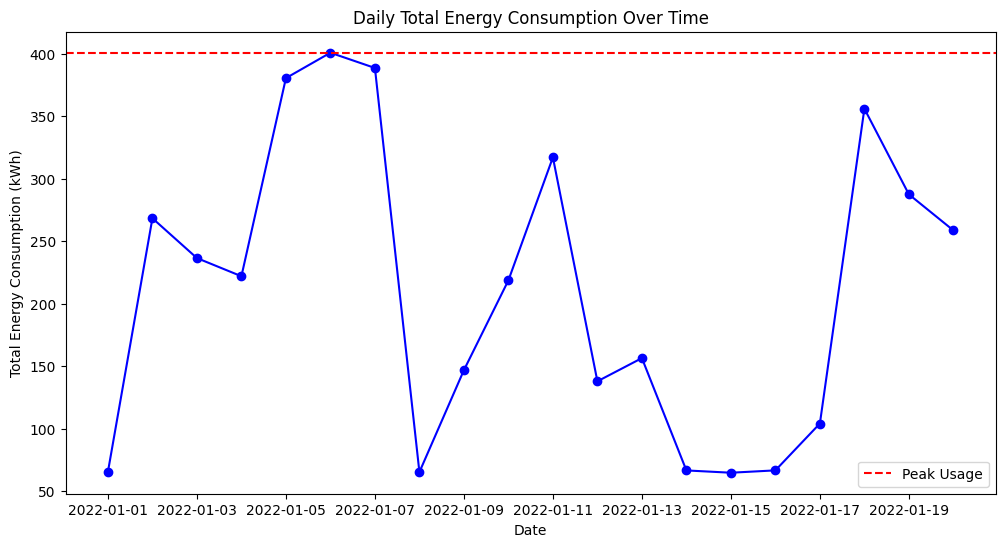

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_consumption['Date'], daily_consumption['Total_Consumption'], color='b', marker='o')
plt.title("Daily Total Energy Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Total Energy Consumption (kWh)")
plt.axhline(peak_usage_days['Total_Consumption'].iloc[0], color='r', linestyle='--', label="Peak Usage")
plt.legend()
plt.show()